**Imports and Setup**

In [2]:
# Install necessary packages first
!pip install minisom numpy pandas matplotlib scikit-learn

#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

#Setup Google Drive
from google.colab import drive
drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=745b6c134d790828f4be80448a58fa09e0710b3e203e4c13bf2f71d80593a95d
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom
Mounted at /content/drive


**Load Dataset - Refactored**

In [4]:
#Load Dataset Function
def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        print("Dataset Loaded Successfully.")
        return df
    except FileNotFoundError:
        print("File not found. Please check the path.")
    except pd.errors.EmptyDataError:
        print("File is empty. Please check the contents.")
    return None

#File path parameterized
file_path = '/content/drive/My Drive/SOM/Credit_Card_Applications.csv'
dataset = load_dataset(file_path)

if dataset is not None:
    print(dataset.head())  # Display first 5 rows for verification

Dataset Loaded Successfully.
   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  


**Data Preprocessing**

In [5]:
# Split dataset into features and labels
def preprocess_data(dataset):
    x = dataset.iloc[:, :-1].values  # Use all rows, all columns except the last one as features
    y = dataset.iloc[:, -1].values   # Use all rows, the last column as labels

    # Feature Scaling
    sc = MinMaxScaler(feature_range=(0, 1))
    x = sc.fit_transform(x)

    return x, y, sc

# Preprocess the data
x, y, sc = preprocess_data(dataset)
print(f"Number of features: {x.shape[1]}")

Number of features: 15


**Training Self-Organizing Map (SOM)**

In [6]:
# Train the SOM Function
def train_som(data, x_dim=8, y_dim=8, input_len=15, sigma=1.0, learning_rate=0.5, num_iterations=100):
    som = MiniSom(x=x_dim, y=y_dim, input_len=input_len, sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(data)
    som.train_random(data=data, num_iteration=num_iterations)
    return som

# Train SOM
som = train_som(x, input_len=x.shape[1])

# Display SOM Summary
print("SOM Trained Successfully.")


SOM Trained Successfully.


**Visualization Improvements**

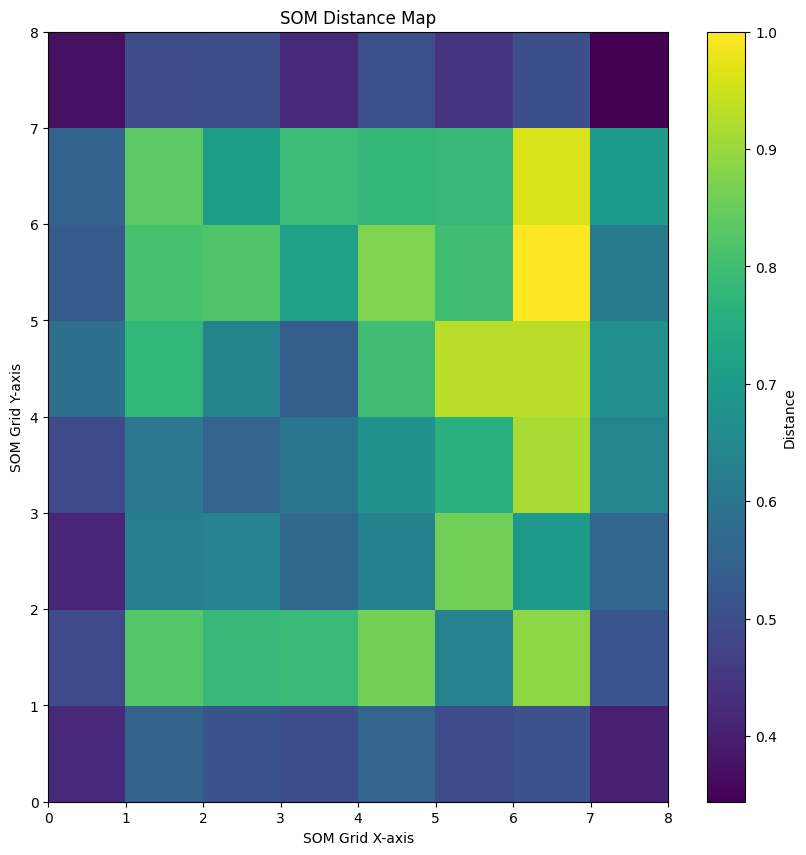

In [7]:
# Visualize the results Function
def plot_som(som):
    plt.figure(figsize=(10, 10))
    plt.title("SOM Distance Map")
    plt.xlabel("SOM Grid X-axis")
    plt.ylabel("SOM Grid Y-axis")
    plt.pcolor(som.distance_map().T)
    plt.colorbar(label='Distance')
    plt.show()

# Plot SOM's distance map
plot_som(som)


**Find Frauds and Export Results**

In [9]:
# Identify Potential Frauds Function
def identify_frauds(som, data):
    mappings = som.win_map(data)

    # Example: Hard-coded neuron locations representing outliers (you might need more logic here)
    frauds_list = []

    # Add neurons to list of frauds if they contain data points
    for coordinates in [(6, 2), (1, 1)]:
        if coordinates in mappings and len(mappings[coordinates]) > 0:
            frauds_list.extend(mappings[coordinates])  # Add all data points mapped to this neuron

    frauds = np.array(frauds_list)
    return frauds

# Find Fraudulent Data Points
frauds = identify_frauds(som, x)

# Convert fraudulent data points back to their original scale
frauds_original_scale = sc.inverse_transform(frauds) if len(frauds) > 0 else []

# Export Fraudulent Data
def save_frauds_to_csv(frauds_data, output_path='fraudulent_records.csv'):
    if len(frauds_data) > 0:
        df_frauds = pd.DataFrame(frauds_data)
        df_frauds.to_csv(output_path, index=False)
        print(f"Fraudulent data points saved to {output_path}")
    else:
        print("No fraudulent data points found to save.")

save_frauds_to_csv(frauds_original_scale)


Fraudulent data points saved to fraudulent_records.csv
